In [1]:
# Importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
fullRaw= pd.read_csv("C:/Users/Asus/Desktop/DataSet/data_set.csv")


In [2]:

trainDf, testDf = train_test_split(fullRaw, train_size=0.7, random_state = 123)

# Create Source Column in both Train and Test
trainDf['Source'] = 'Train'
testDf['Source'] = 'Test'

# Combine Train and Test
fullRaw = pd.concat([trainDf, testDf], axis = 0)
fullRaw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Source
666,192.0,288.0,0.0,192.0,0.0,929.8,716.1,3,12.79,Train
237,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,56,47.13,Train
725,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,120,38.70,Train
802,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,31.65,Train
568,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,7,25.45,Train


In [3]:
columnsForOutlierDetection = ["blast_furnace_slag", "fly_ash", "superplasticizer",'age']

summaryBeforeOutlierCorrection = fullRaw[columnsForOutlierDetection].describe()
summaryBeforeOutlierCorrection

,blast_furnace_slag,fly_ash,superplasticizer,age
count,1030.000000,1030.000000,1030.000000,1030.000000
mean,73.895825,54.188350,6.204660,45.662136
std,86.279342,63.997004,5.973841,63.169912
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,7.000000
50%,22.000000,0.000000,6.400000,28.000000
75%,142.950000,118.300000,10.200000,56.000000
max,359.400000,200.100000,32.200000,365.000000


In [4]:
for column in columnsForOutlierDetection:
    
    print(column)
    
    Q1 = np.percentile(fullRaw.loc[fullRaw["Source"] == "Train", column], 25)
    Q3 = np.percentile(fullRaw.loc[fullRaw["Source"] == "Train", column], 75)
    IQR = Q3 - Q1
    
    UB = Q3 + 1.5*IQR
    LB = Q1 - 1.5*IQR
    
    # Upper bound operation
    fullRaw[column] = np.where(fullRaw[column] > UB, UB, fullRaw[column])
    
    # Lower bound operation
    fullRaw[column] = np.where(fullRaw[column] < LB, LB, fullRaw[column])
    
summaryAfterOutlierCorrection = fullRaw[columnsForOutlierDetection].describe()
    
summaryAfterOutlierCorrection

blast_furnace_slag
fly_ash
superplasticizer
age


,blast_furnace_slag,fly_ash,superplasticizer,age
count,1030.000000,1030.000000,1030.000000,1030.000000
mean,73.892136,54.188350,6.163883,38.070388
std,86.267161,63.997004,5.818837,35.782271
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,7.000000
50%,22.000000,0.000000,6.400000,28.000000
75%,142.950000,118.300000,10.200000,56.000000
max,357.500000,200.100000,26.000000,129.500000


In [5]:
fullRaw.drop(['Source'], axis = 1, inplace = True)

<Axes: >

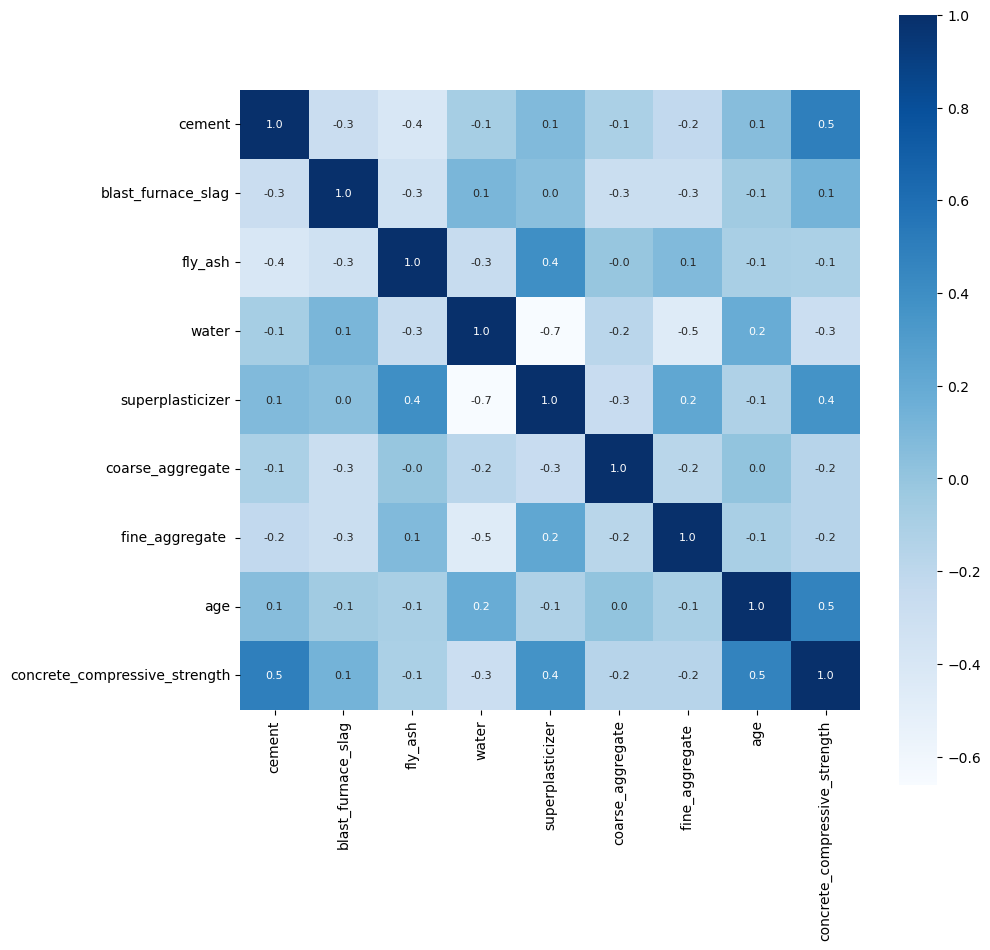

In [6]:
corr=fullRaw.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [7]:
X = fullRaw.drop('concrete_compressive_strength', axis=1)
y = fullRaw['concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = rf_reg.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = rf_reg.score(X_test, y_test)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MSE: 25.77634518287812
RMSE: 5.077040986921232
R-squared: 0.9081922020783776


In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = rf_reg.score(X_test, y_test)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MSE: 25.77634518287812
RMSE: 5.077040986921232
R-squared: 0.9081922020783776


In [14]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) *100
mape

12.673853966500767